<a href="https://colab.research.google.com/github/kommareddysakethreddy/Ml_project_Caffeine/blob/main/notebooks/caffeine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#reading file, also available in '..\data\CarPrice_Assignment.csv'
dataset=pd.read_csv('/content/gdrive/MyDrive/dsaElelctive/caffeine.csv')
dataset.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [ ]:
dataset = dataset.drop(columns=["drink"])
dataset.rename({"Caffeine (mg)":"Caffeine"}, axis=1, inplace=True)
dataset.nunique()

Volume (ml)     70
Calories        98
Caffeine       162
type             6
dtype: int64

In [ ]:
#dummying the values of column type
type_en = pd.get_dummies(dataset["type"])
df1 = dataset.copy()
df1.drop("type", axis=1, inplace=True)
df1 = pd.concat([df1, type_en], axis=1)
df1.head()

,Volume (ml),Calories,Caffeine,Coffee,Energy Drinks,Energy Shots,Soft Drinks,Tea,Water
0,256.993715,0,277,1,0,0,0,0,0
1,250.191810,0,145,1,0,0,0,0,0
2,250.191810,150,100,1,0,0,0,0,0
3,250.191810,0,430,1,0,0,0,0,0
4,250.191810,0,66,1,0,0,0,0,0


In [ ]:
temp = np.array(df1["Caffeine"])
def caffeineContent(caffeine):
    if (caffeine >= 100):
        return 1
    else:
        return 0
caff = np.vectorize(caffeineContent)
cfinal = caff(temp)
df1.drop(columns=["Caffeine"])
df1["Caffeine"] = cfinal;
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Volume (ml)    610 non-null    float64
 1   Calories       610 non-null    int64  
 2   Caffeine       610 non-null    int64  
 3   Coffee         610 non-null    uint8  
 4   Energy Drinks  610 non-null    uint8  
 5   Energy Shots   610 non-null    uint8  
 6   Soft Drinks    610 non-null    uint8  
 7   Tea            610 non-null    uint8  
 8   Water          610 non-null    uint8  
dtypes: float64(1), int64(2), uint8(6)
memory usage: 18.0 KB


,Volume (ml),Calories,Caffeine,Coffee,Energy Drinks,Energy Shots,Soft Drinks,Tea,Water
0,256.993715,0,1,1,0,0,0,0,0
1,250.191810,0,1,1,0,0,0,0,0
2,250.191810,150,1,1,0,0,0,0,0
3,250.191810,0,1,1,0,0,0,0,0
4,250.191810,0,0,1,0,0,0,0,0


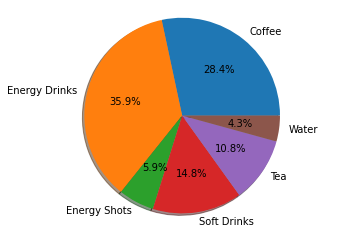

In [ ]:
labels = dataset['type'].astype('category').cat.categories.tolist()
counts = dataset['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

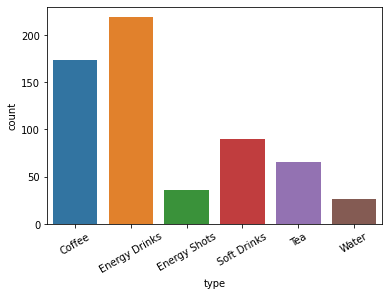

In [ ]:
cp = sns.countplot(x='type', data=dataset)
cp.set_xticklabels(cp.get_xticklabels(), rotation=30)
plt.show()

In [ ]:
df1.to_csv('..\final_caffeine.csv',index=False)